<a href="https://colab.research.google.com/github/20014894UHI/20014894_Data_analytics_assignment1/blob/main/Assignment_2_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 - Linear Regression Model
## Train and test a linear regressor

(Shared with 1122131uhi)

End-to-end workflow  consists of
- Training
- Validation on a holdout set generated from the original training data
- Evaluation on the test data

In [2]:
# needed to create the data frame
import pandas as pd

# needed to help with speedy maths based calculations
import numpy as np

# create data frame from csv file we hosted on our github
# lrdf = pd.read_csv("https://raw.githubusercontent.com/20014894UHI/20014894_Data_analytics_assignment1/main/daassignment2lineardata_b.csv", index_col=0,)
# This one has num_collisions re-included
lrdf = pd.read_csv("https://raw.githubusercontent.com/20014894UHI/20014894_Data_analytics_assignment1/main/daassignment2lineardata_c.csv", index_col=0,)
#df1 = pd.read_csv('https://raw.githubusercontent.com/20014894UHI/20014894_Data_analytics_assignment1/main/daassignment2lineardata.csv', index_col=0, )

In [5]:
# make sure we have our data by printing it out
print(lrdf[:7])
#print(lrdf[:6])
# print(df) #all

   dowStartSun  scaledCollisions      dewp  temperature  visibility  \
1            6          0.357843 -4.111111     2.500000         9.8   
2            7          0.176471  1.833333     5.277778         5.9   
3            2          0.284314  0.055556     3.166667         9.2   
4            3          0.215686 -1.333333     3.555556        10.0   
5            4          0.176471 -3.055556     3.000000        10.0   
6            5          0.495098 -6.333333     1.833333        10.0   
7            6          0.431373 -6.944444     0.000000        10.0   

   wind_speed  snow_depth  bft_wind_scale  num_collisions  fatalities  \
1         4.4         0.0               2             257           2   
2         6.2         0.0               2             220           1   
3         5.3         0.0               2             242           1   
4         3.9         0.0               1             228           0   
5         6.4         0.0               2             220         

In [6]:
# A scale is not required here, but the constant will be useful in the assignment.
SCALE_NUM_COLLISIONS = 1.0

In [11]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__) # 2.12

2.12.0


# Method 1
## Univariate linear regression

A linear regression model assumes a linear relationship.
scaledCollisions = intercept + temperature * slope + error
This is an example of a univariate regression.


In [ ]:
# create data frame from csv file we hosted on our github
lrdc = pd.read_csv("https://raw.githubusercontent.com/20014894UHI/20014894_Data_analytics_assignment1/main/daassignment2lineardata_c.csv", index_col=0,)

# DEFINE THE targets and features
scaledCollisions = np.array(lrdc['scaledCollisions'], np.float32)
temperature = np.array(lrdc['temperature'], np.float32)
snow_depth = np.array(lrdc['snow_depth'], np.float32)

# define the intercept and slope as trainable variables
intercept = tf.Variable (0.1, np.float32)
slope = tf.Variable(0.1, np.float32)

In [ ]:
# univariate regression model with temperature
# Define a Linear Regression Model which we will use to make predictions by multiplying
# temperature and slope and adding the intercept
def linear_regression(intercept, slope, features = temperature):
  return intercept + features * slope

#def linear_regression(intercept, slope, feature1 = temperature, feature2 = snow_depth):
#  	return intercept[0] + feature1*intercept[1] + feature2*intercept[2]

# compute the predicted values and loss
# Use Mean Squared Error Loss this time
def loss_function(intercept, slope, targets = scaledCollisions, features = temperature):
  #predictions = linear_regression (intercept, slope) # one example omitted features but think it should be included
  predictions = linear_regression (intercept, slope, features)
  return tf.keras.losses.mse(targets, predictions)

# define an optimization operation
# This will change the slope and intercept in a direction that will lower the value of the loss.
opt = tf.keras.optimizers.Adam()

# aDDED Compute the loss for different slope and intercept values
print(loss_function(0.1, 0.1).numpy())
print(loss_function(0.1, 0.5).numpy())

# Minimise the loss function and print the loss
for j in range(1000): # execute 1000 times
	# Apply minimize, pass the loss function, and supply the variables
  opt.minimize(lambda:loss_function(intercept, slope), \
  var_list = [intercept, slope])
  print (loss_function(intercept,slope))

# print the trained parameters
# print (intercept.numpy, slope.numpy())
# Print every 10th value of the loss
if j % 100 == 0:
		print(loss_function(intercept, slope).numpy())

The loss tends to decline and move closer to the minimum value with each iteration.

In [26]:
import matplotlib.pyplot as plt

def plot_results(intercept, slope):
    temp_range = np.linspace(-10,40,100)
    scaledCollisions_pred = [intercept + slope * s for s in temp_range]
    plt.figure(figsize=(8, 8))
    plt.scatter(temperature, scaledCollisions, color = 'black');
    plt.plot(temp_range, scaledCollisions_pred, linewidth=3.0, color='red');
    plt.xlabel('temperature');
    plt.ylabel('scaledCollisions');
    plt.title('Scatterplot of data and fitted regression line');

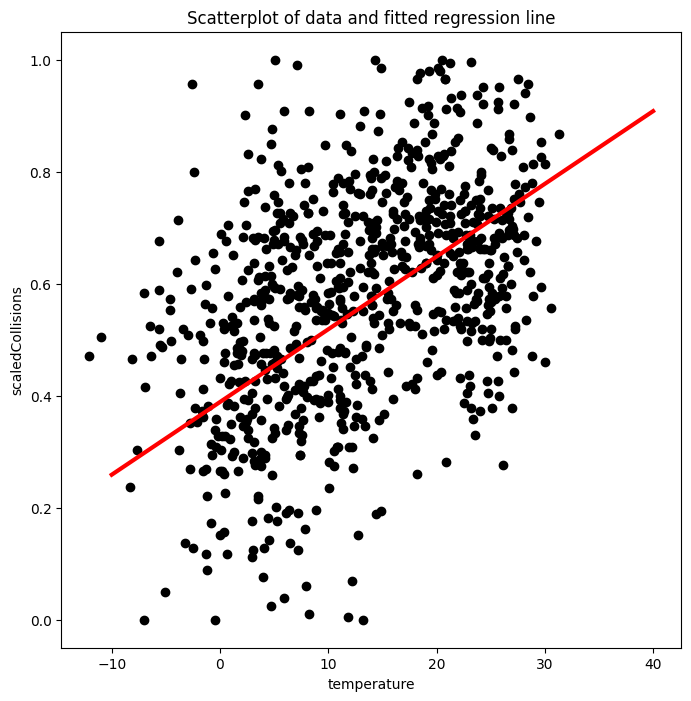

In [24]:
# Plot data and regression line
plot_results(intercept, slope)

## Multivariate linear regression

Multiple regression model
Again scaledCollisions is the target and temperature and snow_depth are the features. This example switches from the mean squared error loss to the mean absolute error loss: keras.losses.mae().
The predicted values are computed as follows: params[0] + feature1 * params[1] + feature2 * params[2]. A vector of parameters (params) is defined as a variable, rather than using three variables. params[0] is the intercept and params[1] and params[2] are the slopes.

In [36]:
def print_results(params):
    return print('loss: {:0.3f}, intercept: {:0.3f}, slope_1: {:0.3f}, slope_2: {:0.3f}'
                 .format(loss_function(params).numpy(),
                         params[0].numpy(),
                         params[1].numpy(),
                         params[2].numpy()))

In [41]:
# Multivariate linear regression
params = tf.Variable([0.1, 0.05, 0.02], tf.float32)
# Define a Linear Regression Model which we will use to make predictions by multiplying
# temperature and slope and adding the intercept
def linear_regression(params, feature1=temperature, feature2=snow_depth):
	return params[0] + feature1*params[1] + feature2*params[2]

# Define the loss function
def loss_function(params, targets=scaledCollisions, feature1=temperature, feature2=snow_depth):
  # Set the predicted values
	predictions = linear_regression(params, feature1, feature2)
  # The predicted values are computed as follows:
  # params[0] + feature1 * params[1] + feature2 * params[2].
  # A vector of parameters (params) is defined as a variable, rather than using three variables.
  # params[0] is the intercept and params[1] and params[2] are the slopes.

  # Use the mean absolute error loss this time
	return keras.losses.mae(targets, predictions)

# Define the optimize operation
opt = keras.optimizers.Adam()

# Perform minimization and print trainable variables
for j in range(10):
	opt.minimize(lambda: loss_function(params), var_list=[params])
	print_results(params)

 # ADDED
 # Print trained parameters
print(params.numpy(), slope.numpy())

loss: 0.470, intercept: 0.099, slope_1: 0.049, slope_2: 0.019
loss: 0.452, intercept: 0.098, slope_1: 0.048, slope_2: 0.018
loss: 0.435, intercept: 0.097, slope_1: 0.047, slope_2: 0.017
loss: 0.417, intercept: 0.096, slope_1: 0.046, slope_2: 0.016
loss: 0.400, intercept: 0.095, slope_1: 0.045, slope_2: 0.015
loss: 0.383, intercept: 0.094, slope_1: 0.044, slope_2: 0.014
loss: 0.367, intercept: 0.093, slope_1: 0.043, slope_2: 0.013
loss: 0.352, intercept: 0.092, slope_1: 0.042, slope_2: 0.012
loss: 0.337, intercept: 0.091, slope_1: 0.041, slope_2: 0.011
loss: 0.322, intercept: 0.090, slope_1: 0.040, slope_2: 0.010
[0.09034121 0.04010541 0.01000575] 0.012984519


# Model 0 - Day of week starting Sunday and collisions

To train the system, we will give it many examples of weather collision data including the labels and predictors.

In [8]:
# create a dataframe with the inputs and the output at the end using the imported dataframe.
df_input_data_day = [lrdf["dowStartSun"], lrdf["scaledCollisions"]]
# create headers for our new dataframe. These should correlate with the above.
df_input_headers_day = ["dowStartSun", "scaledCollisions"]
# create a final dataframe using our new dataframe and headers.
df_input_day = pd.concat(df_input_data_day, axis=1, keys=df_input_headers_day)

### Construct a training set for running through the model and a test set


In [9]:
# construct a training set for running through the model and a test set
# Use a sample with 0.8 for an 80% training set and 20% for test.
training_set_day = df_input_day.sample(frac=0.8, random_state=0)
test_set_day = df_input_day.drop(training_set_day.index)

In [10]:
# copy the datasets
training_features_day = training_set_day.copy()
test_features_day = test_set_day.copy()

# Remove the output (scaledCollisions) column
training_labels_day = training_features_day.pop('scaledCollisions')
test_labels_day = test_features_day.pop('scaledCollisions')

### Scale factor

In [11]:
# Put in a scale factor and divide by it.
# In this dataset, it was already scaled so it is 1.
# We will use a referece table of scaledCollisions versus corresponding collisions by year to test

# DELETE However, 600000 is what would make sense based on the data here and we can use this later when testing our model..
training_labels_day = training_labels_day/SCALE_NUM_COLLISIONS
test_labels_day = test_labels_day/SCALE_NUM_COLLISIONS

In [12]:
print(training_features_day)

     dowStartSun
9              2
576            1
617            7
143            4
237            1
..           ...
465            7
26             5
111            6
150            4
153            7

[643 rows x 1 columns]


### Normalization layer

In [13]:
# boiler plate for this model. training_features used here for our normalisation layer that we try and fit to the outputs.
normaliser_day = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
# axis =None => the layer will normalize all elements in the input by a scalar mean and variance. (TF Docs)
# tf.keras.layers.Normalization(axis=-1)
# adapt() - alternative to passing in mean and variance arguments during layer construction.
# A Normalization layer should always either be adapted over a dataset or passed mean and variance.(TF docs)
normaliser_day.adapt(np.array(training_features_day))

In [14]:
print(test_features_day)

      dowStartSun
10              3
12              5
20              6
24              3
29              1
...           ...
3902            3
3905            6
3907            1
3912            6
3919            6

[161 rows x 1 columns]


In [15]:
# Model model_0. Add normaliser and we are expecting a single output.
model_0 = tf.keras.Sequential([
    normaliser_day,
    layers.Dense(units=1)
])

In [17]:
# We specify the training configuration (optimizer, loss, metrics):
#model.compile(
 #   optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
  #  loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
   # metrics=[keras.metrics.SparseCategoricalAccuracy()],
#)

# Optimizer that implements the Adam algorithm. (TF Docs).
model_0.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

### Train the model

We call fit() to train the model and repeatedly iterate over the dataset for 100 epochs.This specifies to use 20% of the data for validation.

In [ ]:
print("Fit model on training data")

In [20]:
# Fit the model where we require the training features and labels.
# We will run it 100 times i.e. epochs and we have applied a further 20% validation split.
%%time
history = model_0.fit(
    training_features_day,
    training_labels_day,
    epochs=100,
    verbose=0,
    validation_split = 0.2) # Further validation split - use 20% of the data for validation"

#%%time
#history = model_0.fit(
 #   training_features_day,
  #  training_labels_day,
    #batch_size=64, # added
   # epochs=100,
    #verbose=0,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    # validation_data=(x_val, y_val),
   # validation_split = 0.2) # Further validation split

CPU times: user 6.84 s, sys: 304 ms, total: 7.14 s
Wall time: 7.62 s


The returned history object holds a record of the loss values and metric values during training.

In [154]:
history.history

{'loss': [0.4920499622821808,
  0.21022096276283264,
  0.1701233983039856,
  0.16009175777435303,
  0.16270039975643158,
  0.17362859845161438,
  0.1749451905488968,
  0.16322197020053864,
  0.1686091125011444,
  0.16732661426067352,
  0.16629253327846527,
  0.17254124581813812,
  0.1779935657978058,
  0.15854014456272125,
  0.16098269820213318,
  0.16632823646068573,
  0.18428035080432892,
  0.16284562647342682,
  0.18584050238132477,
  0.16856160759925842,
  0.16979046165943146,
  0.17089363932609558,
  0.17118598520755768,
  0.16933698952198029,
  0.16013453900814056,
  0.16956116259098053,
  0.17261235415935516,
  0.16012577712535858,
  0.1645456701517105,
  0.17242681980133057,
  0.15785939991474152,
  0.1722985804080963,
  0.16277988255023956,
  0.17529191076755524,
  0.16542819142341614,
  0.17845922708511353,
  0.1675305962562561,
  0.17274510860443115,
  0.18025967478752136,
  0.18196028470993042,
  0.1606353372335434,
  0.16645218431949615,
  0.1623295098543167,
  0.166967317

### Evaluate the model on the test data


In [25]:
# Cost function that measures the distance between the linear model’s predictions and the training examples
# objective is to minimise this distance.
# Training the model.
# Feed training examples into Linear Regression algorithm.
# It finds the parameters that make the linear model fit best the data.

# The error rate on new cases is called the generalisation error (or out-of-sample error), and by evaluating your model on the test set, you get an estimation of this error.
# This value tells you how well the model will perform on instances it has never seen before.
# by evaluating the model on the test set, you get an estimation of this error.
# If the training error is low (i.e. your model makes few mistakes on the training set) but the generalisation error is high,
# it means that your model is overfitting the training data.

print("Evaluate on test data")
# Evaluate our model using the test features and labels using `evaluate`
mean_absolute_error_model_0 = model_0.evaluate(
    test_features_day,
    test_labels_day, verbose=0)

Evaluate on test data


In [73]:
# Print mean absolute error of the model. We want to minimise this.
# It will also vary on each training run due to randomisation.
# print(mean_absolute_error_model_0)
print('LinearRegression has MAE of {0}'.format(mean_absolute_error_model_0));

LinearRegression has MAE of 0.1499038189649582


### Reference table of sample scaledCollision and corresponding collision values for 2022 for testing purposes

In [26]:
# Reference of min and max collisions for 2021, 2022, 2023
refMinMaxCollByYear = pd.DataFrame.from_dict(data =
				{
            'Year' : ['2021','2022','2023'],
            'Min Collisions' : [184, 180, 128 ],
            'Max Collisions' : [388, 365,314 ]

        })
refMinMaxCollByYear

,Year,Min Collisions,Max Collisions
0,2021,184,388
1,2022,180,365
2,2023,128,314


In [ ]:
# The feature scaling formula we used in the R sheet was:
# x-min(x) / max(x) - min(x).
# scaledCollisions=(num_collisions - min(num_collisions)) /(max(num_collisions-min(num_collisions))
# So for 2022 it was:
# scaledCollisions = (num_collisions - 180) / 185
# scaledCollisions * 185 = num_collisions - 180
# Take the example of .4 for scaledCollisions
# .4 * 185 = num_collisions - 180
# 74 = num_collisions - 180
# num_collisions = 254

In [1]:
# For testing, create a dataframe as a reference with the scaledCollision value for 2022 and
# corresponding collision value that the scaledCollision equates to for 2022
a22 = 185
b22 = 180
referencedf = pd.DataFrame.from_dict(data =
				{
            'scaledCollision2022' : [.1,.2,.3,.4,.5,.6,.7,.8,.9],
            # This would be much neater in a mutate equivalent ...
            'Collisions' : [(.1 * a22 +b22),(.2 *a22 +b22) ,(.3 *a22 +b22), (.4 *a22 +b22),(.5 *a22 +b22),  (.6 *a22 +b22),(.7 *a22 +b22),(.8 *a22 +b22),(.9 *a22 + b22) ]
        })
referencedf

NameError: ignored

### Generate predictions based on test data

In [151]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions0 = model_0.predict(test_features_day[:3])
# Could do the conversion step from scaled collisions to collisions here instead
# predictions0 = model_0.predict(test_features_day[:3] * a22 +b22 )
print("predictions shape:", predictions0.shape)

Generate predictions for 3 samples
1/1 [==============================] - 0s 25ms/step
predictions shape: (3, 1)


View predictions for 3 samples.


In [150]:
a22 = 185
b22 = 180
print(test_features_day[:3])
#predictions
print(predictions0[0])
# corresponding collision value that the scaledCollision equates to based on scaled collisions for 2022
print (predictions0[0])# * a22 +b22 )

print(predictions0[1])
# corresponding collision value that the scaledCollision equates to based on scaled collisions for 2022
print (predictions0[1] * a22 +b22 )

print(predictions0[2])
# corresponding collision value that the scaledCollision equates to based on scaled collisions for 2022
print (predictions0[2] * a22 +b22 )

    dowStartSun
10            3
12            5
20            6
[8.131664]
[8.131664]
[11.94655]
[2390.1118]
[13.853992]
[2742.9885]


# Model 1 - Day of week starting Sunday, Temperature and Scaled Collisions

In [81]:
# create a dataframe with the inputs and the output at the end using the imported dataframe.
# This instance has day of week, temperature, snow depth
df1_input_data = [lrdf["dowStartSun"], lrdf["temperature"], lrdf["snow_depth"], lrdf["scaledCollisions"]]
# create headers for our new dataframe.
df1_input_headers = ["dowStartSun", "temperature", "snow_depth", "scaledCollisions"]
# create a final dataframe using our new dataframe and headers.
df1_input = pd.concat(df1_input_data, axis=1, keys=df1_input_headers)

### Create training and test set and sequential model and fit the model

In [82]:
# construct a training set for running through the model and a test set.  Use sample with 0.8 for an 80% training set and 20% for test.
training_set1 = df1_input.sample(frac=0.8, random_state=0)
test_set1 = df1_input.drop(training_set1.index)

In [83]:
# copy the datasets and remove the final column
training_features1 = training_set1.copy()
test_features1 = test_set1.copy()

training_labels1 = training_features1.pop('scaledCollisions')
test_labels1 = test_features1.pop('scaledCollisions')

In [84]:
# Here I have put in a scale factor and divided by it. In this dataset, I had already normalised and thus it is 1.
# However, 600000 is what would make sense based on the data here and we can use this later when testing our model..
training_labels1 = training_labels1/SCALE_NUM_COLLISIONS
test_labels1 = test_labels1/SCALE_NUM_COLLISIONS

In [85]:
# boiler plate for this model. You can see that we have used the training_features here for our normalisation layer that we try and fit to the outputs.
normaliser = tf.keras.layers.Normalization(axis=-1)
normaliser.adapt(np.array(training_features1))

In [86]:
# model_1. We add our normaliser and we are expecting a single output.
model_1 = tf.keras.Sequential([
    normaliser,
    layers.Dense(units=1)
])

In [87]:
# more boiler plate for creating a sequential model, we need an optimiser and loss parameter.
model_1.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [88]:
# fit the model where we require the training features and labels. We will run it 100 times i.e. epochs
# and applied a further 20% validation split.
%%time
history1 = model_1.fit(
    training_features1,
    training_labels1,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

CPU times: user 7.12 s, sys: 251 ms, total: 7.37 s
Wall time: 10.7 s


### Evaluate the model on the test data


In [120]:
print("Evaluate on test data")
# Evaluate our model using the test features and labels using `evaluate`
mean_absolute_error_model_1 = model_1.evaluate(
    test_features1,
    test_labels1, verbose=0)

# results = model.evaluate(x_test, y_test, batch_size=128)
# The mean absolute error of the model can be printed out. Remember, we want to minimise this. Perhaps a model with just day and NUM_TRIPS would be better. It will also vary on each training run due to randomisation.
# print("test loss, test accuracy:", mean_absolute_error_model_0)

Evaluate on test data


### Evaluate model and mean absolute error

In [122]:
# Print mean absolute error of the model; we want to minimise this.
print('LinearRegression has Mean Absolute Error of {0}'.format(mean_absolute_error_model_1));

LinearRegression has Mean Absolute Error of 0.13897696137428284


### Generate predictions for samples from Test set

In [124]:
# Generate predictions (the output of the last layer) on new data using `predict`
print("Generate predictions for 3 samples from test set")
predictions1 = model_1.predict(test_features1[:3])
# Could do the conversion step from scaled collisions to collisions here instead
# predictions1 = model_1.predict(test_features1[:3] * a22 +b22 )
print("predictions shape:", predictions1.shape)

Generate predictions for 3 samples from test set
1/1 [==============================] - 0s 22ms/step
predictions shape: (3, 1)


View predictions for 3 samples.


In [148]:
a22 = 185
b22 = 180
print(test_features1[:3])
print()

# predictions for scaled collisions
print('Predictions for scaled collisions{0}'. format(np.round(predictions1[0],4)));
# corresponding collision value that the scaledCollision equates to based on scaled collisions for 2022
print('Corresponding collision value based on 2022 {0}'.format(np.round(predictions1[0] * a22 +b22,0 )));
print()

print('Predictions for scaled collisions{0}'. format(np.round(predictions1[1],4)));
# corresponding collision value that the scaledCollision equates to based on scaled collisions for 2022
print('Corresponding collision value based on 2022 {0}'.format(np.round(predictions1[1] * a22 +b22,0 )));
print()

print('Predictions for scaled collisions{0}'. format(np.round(predictions1[2],4)));
# corresponding collision value that the scaledCollision equates to based on scaled collisions for 2022
print('Corresponding collision value based on 2022 {0}'.format(np.round(predictions1[2] * a22 +b22,0 )));


    dowStartSun  temperature  snow_depth
10            3     2.944444         0.0
12            5     6.055556         0.0
20            6     4.944444         0.0

Predictions for scaled collisions[0.5298]
Corresponding collision value based on 2022 [278.]

Predictions for scaled collisions[0.551]
Corresponding collision value based on 2022 [282.]

Predictions for scaled collisions[0.5459]
Corresponding collision value based on 2022 [281.]


### Test data with 3 hypothetical values with moderate temperatures on Friday

In [91]:
# we create a custom dataframe with 3 values per feature.
input_1 = pd.DataFrame.from_dict(data =
				{
            'dowStartSun' : [5,5,5], #  Friday, Friday, Friday
            'temperature' : [20, 25, 30], # Low temp C to correspond to
            'snow_depth' :  [0, 0, 0] # lowest values for NY in dataset were approx 38mm for when snow present
        })

In [98]:
input_1.head()

,dowStartSun,temperature,snow_depth
0,5,20,0
1,5,25,0
2,5,30,0


#### Predictions for hypothetical data

In [99]:
# Not using the multiplication but leaving for reference - we can check this out, you can multiply by 600000 to get more realistic collision values.
linear_day_predictions_1 = model_1.predict(input_1[:3])*SCALE_NUM_COLLISIONS #*600000
# This is not being applied in this case but useful for future reference: essentially 600000 in this instance would give back realistic numbers based on the collision data
# Could do the conversion step from scaled collisions to collisions here instead of below
# predictions0 = model_0.predict(test_features_day[:3] * a22 +b22 )
print(linear_day_predictions_1)

1/1 [==============================] - 0s 56ms/step
[[0.7110062]
 [0.7482315]
 [0.7854567]]


In [102]:
# Calculate the corresponding number of collisions based on the scaled collisions
scaledToNumCollisions = pd.DataFrame.from_dict(data =
				{
            'dowStartSun' : [5,5,5], #  Friday, Friday, Friday
            'temperature' : [20, 25, 30], # Low temp C to correspond to
            'snow_depth' :  [0, 0, 0], # lowest values for NY in dataset were approx 38mm for when snow present
            'scaledCollision predicted' : [0.67876846,0.7318595  ,0.78495055],
            'Corresponding Predicted Collisions based on 2022' : [np.round(.61788183 * a22 +b22),
                                                                  np.round(0.7139833 *a22 +b22) ,
                                                                  np.round(0.7212413 *a22 +b22) ]
        })
scaledToNumCollisions

,dowStartSun,temperature,snow_depth,scaledCollision predicted,Corresponding Predicted Collisions based on 2022
0,5,20,0,0.678768,294.0
1,5,25,0,0.731859,312.0
2,5,30,0,0.784951,313.0


We used Friday for the 3 test records and incremented the temperature by 5 degrees each day, which should occur alongside an increasing number of collisions. There is a marginal increase corresponding to the linear regressor developed earlier for temperature and collisions.  

### Test hypothetical data for colder days with snow

In [104]:
# Colder days with and without snow
input_1a = pd.DataFrame.from_dict(data =
				{
            'dowStartSun' : [5, 5,5,5], #  Friday, Friday, Friday, Fri
            'temperature' : [10, -1, -1, -3], # Low temp C to correspond to
            'snow_depth' :  [0, 0, 39.5, 60] # lowest values for NY in dataset were approx 38mm for when snow present
        })
input_1a.head()

,dowStartSun,temperature,snow_depth
0,5,10,0.0
1,5,-1,0.0
2,5,-1,39.5
3,5,-3,60.0


#### Predictions for hypothetical data and comment

In [105]:
# Not using multiplication by x this but leaving for reference - different example - multiply by 600000 to get more realistic collision values.
linear_day_predictions_1a = model_1.predict(input_1a[:4])*SCALE_NUM_COLLISIONS #*600000
print(linear_day_predictions_1a)

1/1 [==============================] - 0s 92ms/step
[[0.57430744]
 [0.50942206]
 [0.50187373]
 [0.4861589 ]]


In [103]:
# Calculate the corresponding number of collisions based on the scaled collisions
scaledToNumCollisions = pd.DataFrame.from_dict(data =
				{
            'dowStartSun' : [5, 5,5,5], #  Friday, Friday, Friday, Fri
            'temperature' : [10, -1, -1, -3], # Low temp C to correspond to
            'snow_depth' :  [0, 0, 39.5, 60], # lowest values for NY in dataset were approx 38mm for when snow present
          'scaledCollision predicted' : [
                                        linear_day_predictions_1a[0],
                                         linear_day_predictions_1a[1],
                                         linear_day_predictions_1a[2],
                                         linear_day_predictions_1a[3]
                                         ],
            'Corresponding Predicted Collisions based on 2022' :
             [np.rint(linear_day_predictions_1a[0] * a22 +b22),
              np.rint(linear_day_predictions_1a[1] *a22 +b22),
              np.rint(linear_day_predictions_1a[2] *a22 +b22),
              np.rint(linear_day_predictions_1a[3] *a22 +b22)]
        })
scaledToNumCollisions

,dowStartSun,temperature,snow_depth,scaledCollision predicted,Corresponding Predicted Collisions based on 2022
0,5,10,0.0,[0.6365557],[298.0]
1,5,-1,0.0,[0.55466014],[283.0]
2,5,-1,39.5,[0.45406404],[264.0]
3,5,-3,60.0,[0.38696584],[252.0]


We see a general decrease to lower band of collisions in comparison to the test data for a summer temperature range. For colder times of year, the predicted collisions drop with rising snow levels for a constant day of the week.
The test data uses low temperatures. The marginally cold day (10 degrees) has higher collisions than the days below freezing. The collisions drop as the temperature goes down. The days that have the same day and temperature but differing snow levels have different collision levels.The ealier linear regressor modelling indicates that we should expect rising snow depths to be associated with fewer collisions. The predicted collisions for the day with a higher snow depth with a constant temperature and day of week has lower collisions. These findings are in line with the linear regressor modelling.

# Model 2: Day of week starting Sunday, Temperature and Weighted fatalities and injuries

In [107]:
# create a dataframe with the inputs and the output at the end using the imported dataframe.
# This instance day of week, temperature, weighted fatalities and injuries
df2_input_data = [lrdf["dowStartSun"], lrdf["temperature"], lrdf["weighted_fatalities_injuries"]]
# create headers for our new dataframe.
df2_input_headers = ["dowStartSun", "temperature", "weighted_fatalities_injuries"]
df2_input = pd.concat(df2_input_data, axis=1, keys=df2_input_headers)

### Create training and test set and sequential model and fit the model

In [108]:
# construct a training set for running through the model and a test set.  Use sample with 0.8 for an 80% training set and 20% for test.
training_set2 = df2_input.sample(frac=0.8, random_state=0)
test_set2 = df2_input.drop(training_set2.index)

In [109]:
# copy the datasets and remove the final column
training_features2 = training_set2.copy()
test_features2 = test_set2.copy()
training_labels2 = training_features2.pop('weighted_fatalities_injuries')
test_labels2 = test_features2.pop('weighted_fatalities_injuries')

In [110]:
# Here I have put in a scale factor and divided by it. In this dataset, I had already normalised and thus it is 1. However, 600000 is what would make sense based on the data here and we can use this later when testing our model..
training_labels2 = training_labels2/SCALE_NUM_COLLISIONS
test_labels2 = test_labels2/SCALE_NUM_COLLISIONS

In [111]:
# boiler plate for this model. You can see that we have used the training_features here for our normalisation layer that we try and fit to the outputs.
normaliser = tf.keras.layers.Normalization(axis=-1)
normaliser.adapt(np.array(training_features2))

In [112]:
# model_2. We add our normaliser and we are expecting a single output.
model_2 = tf.keras.Sequential([
    normaliser,
    layers.Dense(units=1)
])

In [113]:
# more boiler plate for creating a sequential model, we need an optimiser and loss parameter. Here we are going to be using the mean absolute error MAE
model_2.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [114]:
# now we are going to fit the model where we require the training features and labels. We will run it 100 times i.e. epochs and we have applied a further 20% validation split.
%%time
history2 = model_2.fit(
    training_features2,
    training_labels2,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

CPU times: user 6.95 s, sys: 253 ms, total: 7.21 s
Wall time: 10.8 s


### Evaluate model

In [115]:
# Now, we will evaluate our model using the test features and labels.
mean_absolute_error_model_2 = model_2.evaluate(
    test_features2,
    test_labels2, verbose=0)

### Evaluate mean absolute error

In [ ]:
# Print mean absolute error of the model; we want to minimise this.
# It will also vary on each training run due to randomisation.
# Here we are going to be using the mean absolute error MAE
print('LinearRegression has Mean Absolute Error of {0}'.format(mean_absolute_error_model_2));

LinearRegression has Mean Absolute Error of 0.13897696137428284


#### Generate predictions for samples from Test set

In [ ]:
# Generate predictions (the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples from test set")
predictions2 = model_2.predict(test_features2[:3])
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples from test set
1/1 [==============================] - 0s 22ms/step
predictions shape: (3, 1)


View predictions for 3 samples.


In [ ]:
a22 = 185
b22 = 180
print(test_features2[:3])
print()

print('Predictions for scaled collisions{0}'. format(np.round(predictions2[0],4)));
# corresponding collision value that the scaledCollision equates to based on scaled collisions for 2022
print('Corresponding collision value based on 2022 {0}'.format(np.round(predictions2[0] * a22 +b22,0 )));
print()

print('Predictions for scaled collisions{0}'. format(np.round(predictions1[1],4)));
# corresponding collision value that the scaledCollision equates to based on scaled collisions for 2022
print('Corresponding collision value based on 2022 {0}'.format(np.round(predictions2[1] * a22 +b22,0 )));
print()

print('Predictions for scaled collisions{0}'. format(np.round(predictions1[2],4)));
# corresponding collision value that the scaledCollision equates to based on scaled collisions for 2022
print('Corresponding collision value based on 2022 {0}'.format(np.round(predictions2[2] * a22 +b22,0 )));


    dowStartSun  temperature  snow_depth
10            3     2.944444         0.0
12            5     6.055556         0.0
20            6     4.944444         0.0

Predictions for scaled collisions[0.5298]
Corresponding collision value based on 2022 [278.]

Predictions for scaled collisions[0.551]
Corresponding collision value based on 2022 [282.]

Predictions for scaled collisions[0.5459]
Corresponding collision value based on 2022 [281.]


In [116]:
# Print mean absolute error of the model
# Remember, we want to minimise this.
# Perhaps a model with just day and NUM_TRIPS would be better.
# It will also vary on each training run due to randomisation.
print(mean_absolute_error_model_2)

2.052436113357544


### Test data with 3 hypothetical values with moderate temperatures on Friday

In [117]:
# we create a custom dataframe with 3 values per feature.
input_2 = pd.DataFrame.from_dict(data =
				{
            'dowStartSun' : [5,5,5], #  Friday, Friday, Friday
            'temperature' : [20, 25, 30], # Low temp C to correspond to
        })

In [115]:
input_2.head()

,dowStartSun,temperature
0,5,20
1,5,25
2,5,30


#### Predictions for the hypothetical values

In [121]:
# Not using this but leaving for reference - we can check this out, you can multiply by 600000 to get more realistic collision values.
linear_day_predictions_2 = model_2.predict(input_2[:3])*SCALE_NUM_COLLISIONS #*600000
# This is not being applied in this case but useful for future reference: essentially 600000 in this instance would give back realistic numbers based on the collision data
print(linear_day_predictions_2)

1/1 [==============================] - 0s 21ms/step
[[16.411005]
 [17.529741]
 [18.648478]]


In [122]:
# Calculate the corresponding number of collisions based on the scaled collisions
predictedWfi = pd.DataFrame.from_dict(data =
				{
            'dowStartSun' : [5,5,5], #  Friday, Friday, Friday
            'temperature' : [20, 25, 30], # Low temp C to correspond to
            'Predicted Weighted fatalities and injuries' : [linear_day_predictions_2[0],
                                                            linear_day_predictions_2[1]  ,
                                                            linear_day_predictions_2[2]]
        })
predictedWfi

,dowStartSun,temperature,Predicted Weighted fatalities and injuries
0,5,20,[16.411005]
1,5,25,[17.529741]
2,5,30,[18.648478]
